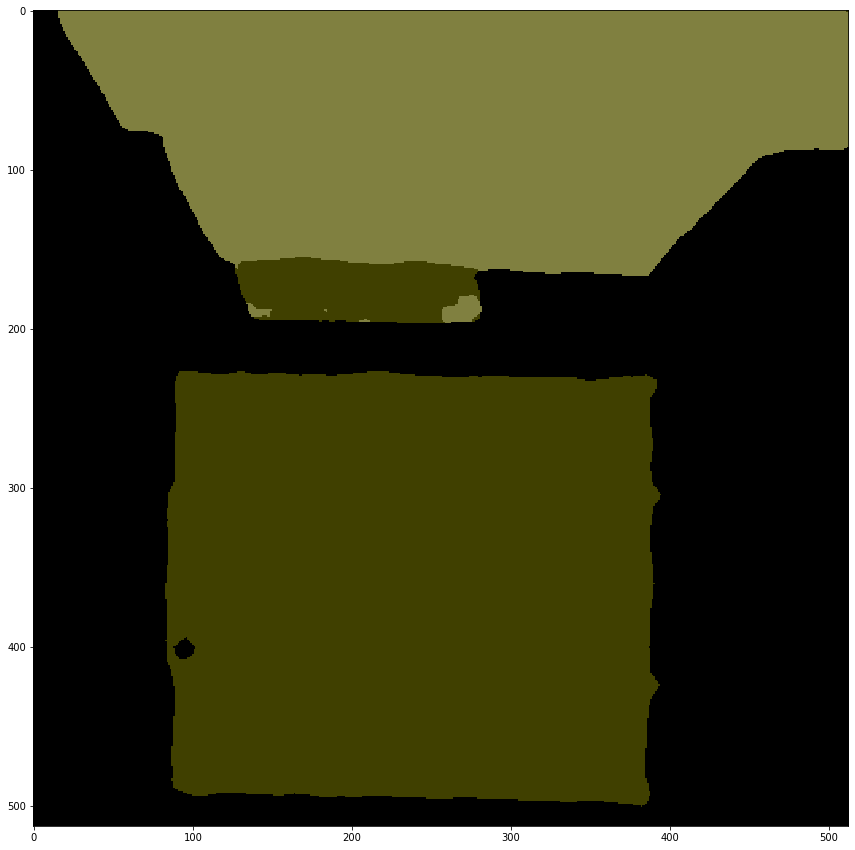

In [49]:
import requests
import json
import cv2
from PIL import Image
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.image as mpimg

#URL = 'http://143.248.94.189:35005/api/predict'
#URL = 'http://143.248.96.81:35005/api/predict'
URL = 'http://143.248.96.69:35005/api/predictIndex'
URLGetColor = 'http://143.248.96.69:35005/api/colorMap'

def convertTuple(list): 
    return tuple(i for i in list) 

LABEL_NAMES = np.array(['wall' ,'building' ,'sky' ,'floor' ,'tree' ,'ceiling' ,'road' ,'bed' ,'windowpane' ,'grass' ,'cabinet' ,'sidewalk' ,'person' ,'earth' ,'door' ,'table' ,'mountain' ,'plant' ,'curtain' ,'chair' ,'car' ,'water' ,'painting' ,'sofa' ,'shelf' ,'house' ,'sea' ,'mirror' ,'rug' ,'field' ,'armchair' ,'seat' ,'fence' ,'desk' ,'rock' ,'wardrobe' ,'lamp' ,'bathtub' ,'railing' ,'cushion' ,'base' ,'box' ,'column' ,'signboard' ,'chest of drawers' ,'counter' ,'sand' ,'sink' ,'skyscraper' ,'fireplace' ,'refrigerator' ,'grandstand' ,'path' ,'stairs' ,'runway' ,'case' ,'pool table' ,'pillow' ,'screen door' ,'stairway' ,'river' ,'bridge' ,'bookcase' ,'blind' ,'coffee table' ,'toilet' ,'flower' ,'book' ,'hill' ,'bench' ,'countertop' ,'stove' ,'palm' ,'kitchen island' ,'computer' ,'swivel chair' ,'boat' ,'bar' ,'arcade machine' ,'hovel' ,'bus' ,'towel' ,'light' ,'truck' ,'tower' ,'chandelier' ,'awning' ,'streetlight' ,'booth' ,'television' ,'airplane' ,'dirt track' ,'apparel' ,'pole' ,'land' ,'bannister' ,'escalator' ,'ottoman' ,'bottle' ,'buffet' ,'poster' ,'stage' ,'van' ,'ship' ,'fountain' ,'conveyer belt' ,'canopy' ,'washer' ,'plaything' ,'swimming pool' ,'stool' ,'barrel' ,'basket' ,'waterfall' ,'tent' ,'bag' ,'minibike' ,'cradle' ,'oven' ,'ball' ,'food' ,'step' ,'tank' ,'trade name' ,'microwave' ,'pot' ,'animal' ,'bicycle' ,'lake' ,'dishwasher' ,'screen' ,'blanket' ,'sculpture' ,'hood' ,'sconce' ,'vase' ,'traffic light' ,'tray' ,'ashcan' ,'fan' ,'pier' ,'crt screen' ,'plate' ,'monitor' ,'bulletin board' ,'shower' ,'radiator' ,'glass' ,'clock' ,'flag'])

#img_path = './data/ki_office/3.png'
img_path = '../../Dataset/test1.jpg'
#img_gt = '../../Dataset/groundtruth1.png'
im1 = cv2.imread(img_path)

rNum, cNum = im1.shape[:2]

strImgTest = '['
for r in range(rNum):
    strImgTest+='['
    for c in range(cNum):
        strTmp = '['+str((im1[r][c][0]))+','+str((im1[r][c][1]))+','+str((im1[r][c][2]))+']'
        strImgTest+=strTmp
        if c !=cNum-1 :
            strImgTest+=','
    strImgTest+=']'
    if r != rNum-1:
        strImgTest += ','
strImgTest+=']'

res = requests.post(url=URL, data={'image':strImgTest})
param = json.loads(res.text)

seg_res = param['seg_index']
seg_array = np.array(seg_res, dtype=np.uint8)
#print(seg_array.shape[:2])

colorMap_request = requests.get(url=URLGetColor)
colorMap_param = json.loads(colorMap_request.text)
colorMap_res = colorMap_param['colorMap']
colorMap = np.array(colorMap_res, dtype=np.uint8)

rowNum, colNum = seg_array.shape[:2]
seg_img = Image.new("RGB", (rowNum, colNum))

for i in range(rowNum):
    for j in range(colNum):
        index = seg_array[i,j] - 1
        #print(seg_array[i,j])
        if LABEL_NAMES[index] == 'bed' or LABEL_NAMES[index] == 'door' or LABEL_NAMES[index] == 'table' or LABEL_NAMES[index] == 'sofa' or LABEL_NAMES[index] == 'shelf' or LABEL_NAMES[index] == 'wardrobe' or LABEL_NAMES[index] == 'chest of drawers' or LABEL_NAMES[index] == 'bookcase' or LABEL_NAMES[index] == 'desk':
            colr = convertTuple(colorMap[index][0])
            seg_img.putpixel((i,j), colr)
            

#seg_img = np.array(Image.fromarray(seg_array))
plt.figure(figsize=(20, 15))
plt.imshow(seg_img)

#height, width = im1.shape[:2]
#dim = (width, height)
#resized = cv2.resize(seg_img, dim, interpolation = cv2.INTER_AREA);


